**sklearn中的集成学习算法**

| Module                            | Description                                 |
|-----------------------------------|---------------------------------------------|
| ensemble.AdaBoostClassifier       | AdaBoost分类器                              |
| ensemble.AdaBoostRegressor        | AdaBoost回归                                |
| ensemble.BaggingClassifier        | 装袋分类器                                  |
| ensemble.BaggingRegressor         | 装袋回归                                    |
| ensemble.ExtraTreesClassifier     | Extra-trees分类器 (极端随机树分类器)         |
| ensemble.ExtraTreesRegressor      | Extra-trees回归                             |
| ensemble.GradientBoostingClassifier | 梯度提升树分类器                            |
| ensemble.GradientBoostingRegressor | 梯度提升树回归                              |
| ensemble.IsolationForest          | 孤立森林                                    |
| ensemble.RandomForestClassifier   | 随机森林分类器                               |
| ensemble.RandomForestRegressor    | 随机森林回归                                 |
| ensemble.VotingClassifier         | 投票方式组合多个模型的分类器                 |

**RandomForestClassifier**

|参数|含义|
|---|---|
|criterion |不纯度的衡量指标，有基尼系数和信息熵两种选择|
|max_depth |树的最大深度，超过最大深度的树枝都会被剪掉|
|min_samples_leaf |一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生|
|min_samples_split |一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生|
|max_features| max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃，默认值为总特征个数开平方取整|
|min_impurity_decrease| 限制信息增益的大小，信息增益小于设定数值的分枝不会发生|

In [19]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.datasets import load_wine

In [20]:
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(wine.data,wine.target,test_size=0.3)
clf=DecisionTreeClassifier(random_state=1)
rfc=RandomForestClassifier(random_state=1)
clf=clf.fit(xtrain,ytrain)
rfc=rfc.fit(xtrain,ytrain)
score1=clf.score(xtest,ytest)
score2=rfc.score(xtest,ytest)
print(score1,score2)


0.8518518518518519 0.9629629629629629


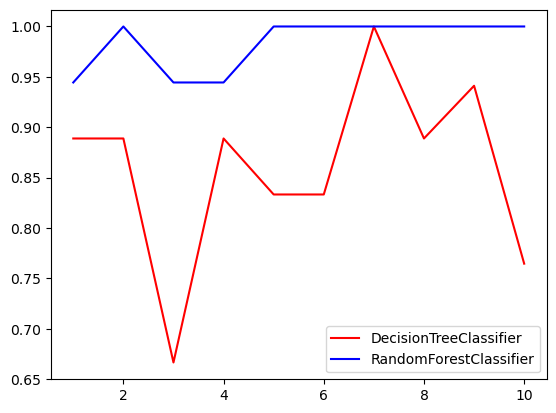

In [22]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc=RandomForestClassifier(n_estimators=30)
clf=DecisionTreeClassifier()
score1=cross_val_score(clf,wine.data,wine.target,cv=10)
score2=cross_val_score(rfc,wine.data,wine.target,cv=10)
plt.plot(range(1,11),score1,c="r",label="DecisionTreeClassifier")
plt.plot(range(1,11),score2,c="b",label="RandomForestClassifier")
plt.legend()
plt.show()

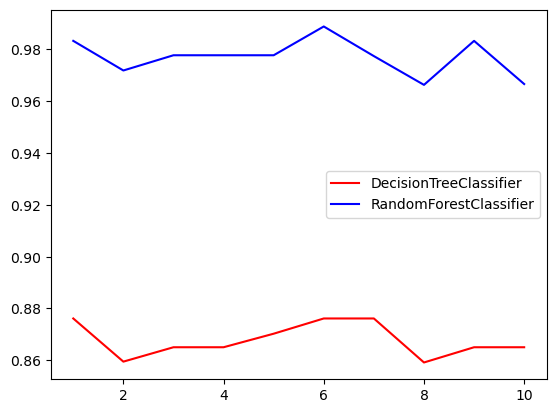

In [23]:
score1=[]
score2=[]
for i in range(10):
    score=cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    score1.append(score)
    score=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    score2.append(score)
plt.plot(range(1,11),score1,c="r",label="DecisionTreeClassifier")
plt.plot(range(1,11),score2,c="b",label="RandomForestClassifier")
plt.legend()
plt.show()

In [25]:
a=[]
for i in range(100):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    a.append(rfc_s)
print(max(a),a.index(max(a)))
plt.figure()
plt.plot(range(1,101),a)
plt.show()

TypeError: '>' not supported between instances of 'RandomForestClassifier' and 'RandomForestClassifier'